In [1]:
import cPickle as pickle
import matplotlib.pylab as pl
%matplotlib inline

In [2]:
n_layers = 9
accuracy_table, progress_table = {}, {}
for n_moments in (3, 5, 7, 9):
    accuracy_table[n_moments], progress_table[n_moments] = \
        pickle.load(open('info/cifar-previous-%d-moment-network-%d' % (n_moments, n_layers), 'rb'))
baseline_accuracy, baseline_progress = \
    pickle.load(open('info/triple-state-normal-residual-network-%d' % n_layers))

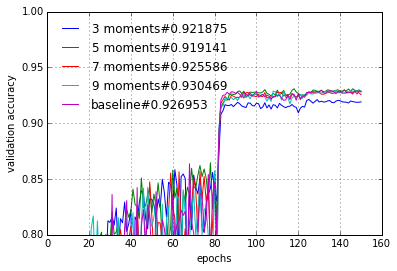

In [3]:
for key, value in sorted(accuracy_table.items()):
    progress = progress_table[key]
    validation_accuracy = progress['validation_accuracy']
    label = '%d moments#%f' % (key, value)
    pl.plot(range(len(validation_accuracy)), validation_accuracy, label=label)
validation_accuracy = baseline_progress['validation_accuracy']
label = 'baseline#%f' % baseline_accuracy
pl.plot(range(len(validation_accuracy)), validation_accuracy, label=label)
pl.legend(framealpha=0, loc=0)
pl.grid()
pl.ylim(0.8, 1)
pl.xlabel('epochs')
pl.ylabel('validation accuracy')

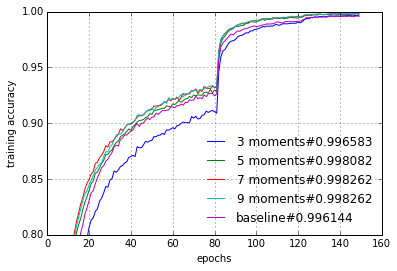

In [5]:
for key, value in sorted(accuracy_table.items()):
    progress = progress_table[key]
    training_accuracy = progress['training_accuracy']
    label = '%d moments#%f' % (key, max(training_accuracy))
    pl.plot(range(len(training_accuracy)), training_accuracy, label=label)
training_accuracy = baseline_progress['training_accuracy']
pl.plot(range(len(training_accuracy)), training_accuracy, label='baseline#%f' % max(training_accuracy))
pl.legend(framealpha=0, loc=0)
pl.grid()
pl.ylim(0.8, 1)
pl.xlabel('epochs')
pl.ylabel('training accuracy')